### Machine learning: Neural network 1
A neural network (NN) is a machine learning model consisting of layers of neurons and nonlinearities in the form of activation functions. In the simplest form, only a single hidden layer is used in addition to the input and output layers. These models are typically trained in the supervised manner so that the desired outputs are known the each input. The training adjusts iteratively the model parameters, that is, the neuron weights and biases, and the model architecture and the training process are affected by hyperparameters.

Implement a NN with PyTorch. Take into account the following:

* Define the loss function according to the task.
* Use automatic differentiation (autograd) in the training loop.
* Select the hyperparameters so that the model is as simple as possible for solving the task (Ockham's razor) and the training converges well.
* Train the model with the given data and demonstrate that it works.

Hints: autograd, nn.

In [1]:
# Based on Stevens et al. Deep learning with PyTorch, Manning Publications Co, 2020

import numpy as np
import torch

Load the CSV data to a NumPy array

In [2]:
datafile = "t005b.csv"
data_np = np.loadtxt(datafile, dtype=np.float32, delimiter=",")
data_np.shape

(20, 2)

Plot the data

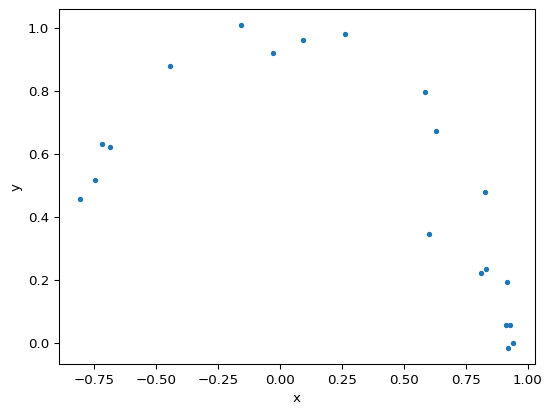

In [3]:
from matplotlib import pyplot as plt

fig = plt.figure(dpi=96)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(data_np[:, 0], data_np[:, 1], '.')

Create tensors from the NumPy array

In [4]:
x = torch.from_numpy(data_np[:, 0]).unsqueeze(1)
y = torch.from_numpy(data_np[:, 1]).unsqueeze(1)
x_min = torch.min(x, 0).values
x_max = torch.max(x, 0).values
x.shape, x_min, x_max, y.shape

(torch.Size([20, 1]), tensor([-0.8049]), tensor([0.9412]), torch.Size([20, 1]))

Determine the indices of samples for the training and validation subsets

In [6]:
n_samples = x.shape[0]
n_val = int(0.2 * n_samples)

torch.manual_seed(0)
shuffled_ind = torch.randperm(n_samples)

train_ind = shuffled_ind[:-n_val]
val_ind = shuffled_ind[-n_val:]

train_ind, val_ind

(tensor([ 4,  5, 13, 19,  7, 14,  3,  6,  9, 17, 11,  2, 16, 18, 10, 12]),
 tensor([15,  8,  1,  0]))

Divide the data into training and validation subsets

In [7]:
x_train = x[train_ind]
y_train = y[train_ind]

x_val = x[val_ind]
y_val = y[val_ind]

x_train.shape, x_val.shape

(torch.Size([16, 1]), torch.Size([4, 1]))

Prepare a simple neural network architecture for the regression. (Using named layers with a dictionary is not compulsory, but can be helpful with complex architectures.)

In [8]:
import torch.nn as nn
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 2)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(2, 1))
]))
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=2, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=2, out_features=1, bias=True)
)

Show the parameters of the model

In [9]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([2, 1])
hidden_linear.bias torch.Size([2])
output_linear.weight torch.Size([1, 2])
output_linear.bias torch.Size([1])


Define the training loop for the model using the training and validation data as well as automatic differentiation.

In [10]:
def training_loop(n_epochs, optimiser, model, loss_fn, x_train, x_val,
                  y_train, y_val):
    for epoch in range(1, n_epochs + 1):
        yPred_train = model(x_train)
        loss_train = loss_fn(yPred_train, y_train)

        yPred_val = model(x_val)
        loss_val = loss_fn(yPred_val, y_val)
        
        optimiser.zero_grad()
        loss_train.backward()
        optimiser.step()

        if epoch == 1 or epoch % (n_epochs / 10) == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


Call the training loop using stochastic gradient descent as the optimiser and mean-squared error provided by the nn module as the loss function.

In [11]:
import torch.optim as optim

optimiser = optim.SGD(seq_model.parameters(), lr=1e-1)

training_loop(
    n_epochs = 10000, 
    optimiser = optimiser,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    x_train = x_train,
    x_val = x_val, 
    y_train = y_train,
    y_val = y_val)

Epoch 1, Training loss 0.1066, Validation loss 0.0322
Epoch 1000, Training loss 0.0129, Validation loss 0.0065
Epoch 2000, Training loss 0.0125, Validation loss 0.0069
Epoch 3000, Training loss 0.0122, Validation loss 0.0070
Epoch 4000, Training loss 0.0120, Validation loss 0.0070
Epoch 5000, Training loss 0.0118, Validation loss 0.0071
Epoch 6000, Training loss 0.0116, Validation loss 0.0071
Epoch 7000, Training loss 0.0115, Validation loss 0.0072
Epoch 8000, Training loss 0.0114, Validation loss 0.0072
Epoch 9000, Training loss 0.0113, Validation loss 0.0072
Epoch 10000, Training loss 0.0112, Validation loss 0.0072


Plot the data and the resulting model

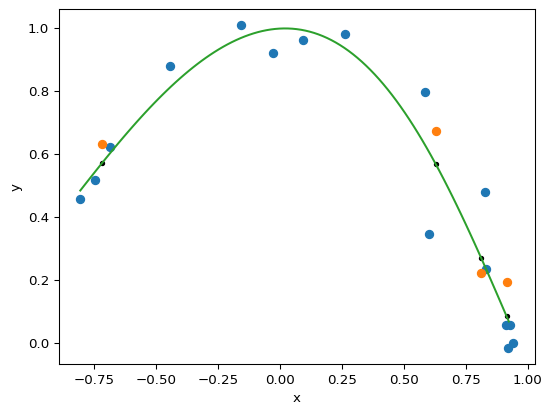

In [12]:
fig = plt.figure(dpi=96)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.plot(x_val.numpy(), y_val.numpy(), 'o')
plt.plot(x_val.numpy(), seq_model(x_val).detach().numpy(), 'k.')
x_range = torch.arange(x_min.item() , x_max.item(), (x_max.item()-x_min.item())/100).unsqueeze(1)
plt.plot(x_range.numpy(), seq_model(x_range).detach().numpy(), '-')

In [13]:
seq_model.

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=2, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=2, out_features=1, bias=True)
)